In [80]:
import pandas as pd
from matplotlib import pyplot as mp
import numpy as np
import statistics
from math import sqrt

grid_color = "grey"
label_color = "black"
plot_color="green"
title_fontsize = 30
axes_fontsize = 15
text_pad = 30
context = {'axes.edgecolor':'grey',
           'axes.facecolor':'white',
           'font.family':'sans-serif', 
           'figure.facecolor':'white', 
           'figure.edgecolor':'white',
           'xtick.color':'black', 
           'ytick.color':'black', 
           'savefig.transparent':'True'}

grt_theoretical = 649.7844
qos = 600

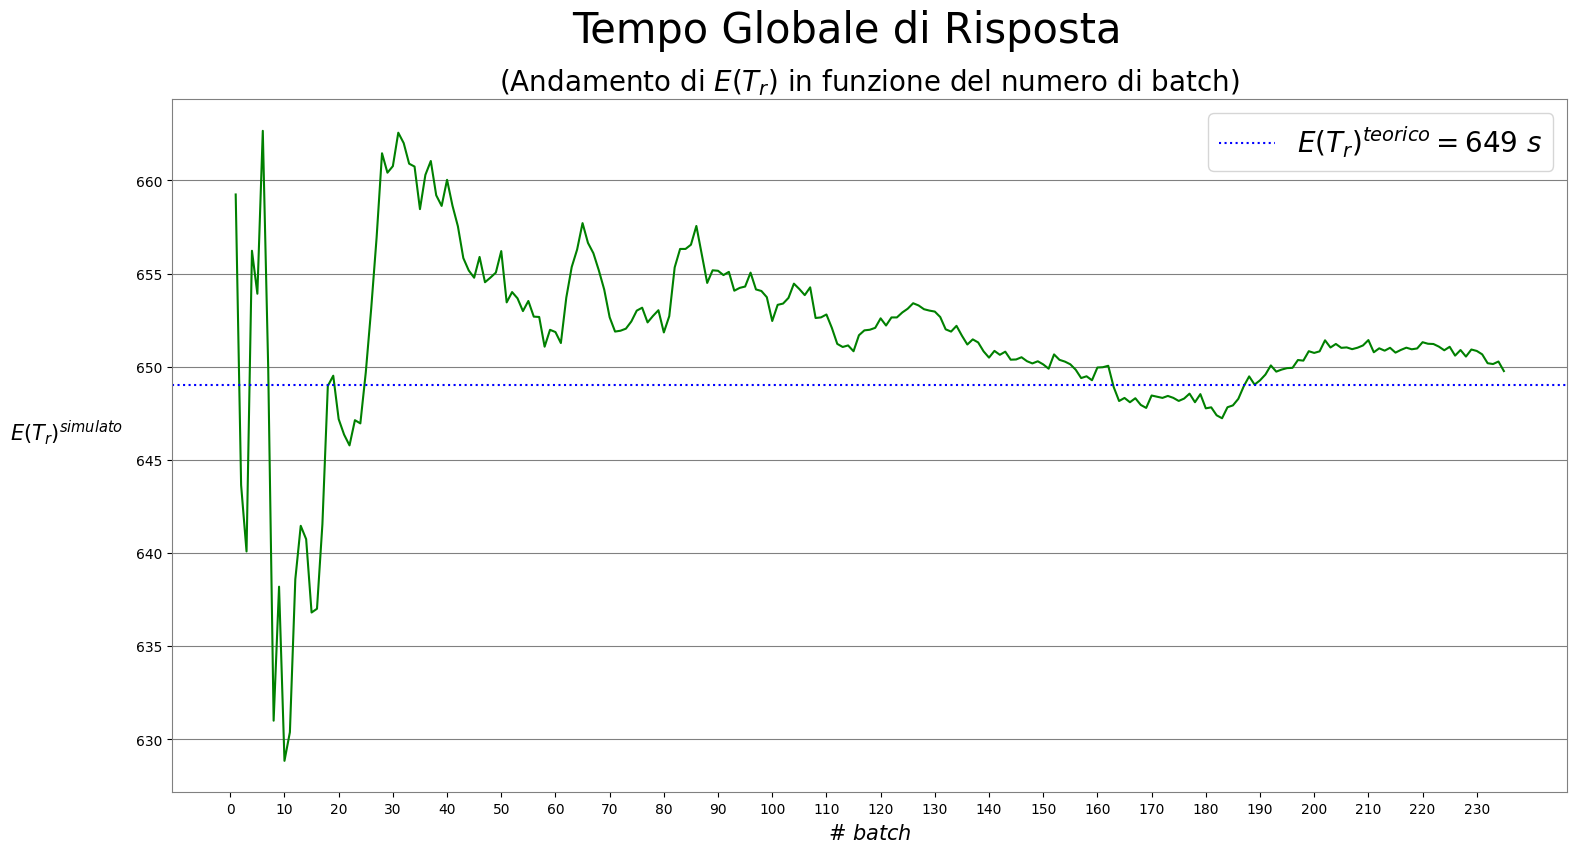

In [60]:
# This block is used to plot the statistics in the infinite simulation.

def plot_infinite_grt():

    df = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/infinite/grt.csv")    
    
    with mp.rc_context(context):
        
        mp.figure(figsize=(18,9))
        
        mp.plot(df.loc[:,'batch_index'], df.loc[:,'grt'], color=plot_color)
        mp.suptitle("Tempo Globale di Risposta", color=label_color, fontsize=title_fontsize)
        mp.title("(Andamento di "+ r"$E(T_{r})$" + " in funzione del numero di batch)", fontsize=20)
        
        mp.grid(axis='y', color=grid_color)
        
        mp.ylabel(r"$E(T_{r})^{simulato}$" , color=label_color, fontsize=axes_fontsize, labelpad=50, rotation=0)
        mp.xlabel(r"$\#\ batch$", color=label_color, fontsize=axes_fontsize, labelpad=5)
        
        start = int(df.loc[:,'batch_index'][0])
        end = int(df.loc[:,'batch_index'][len(df)-1])
        
        mp.axhline(y = grt_theoretical, color = 'b', linestyle = ':', label = r"$E(T_{r})^{teorico} = 649\ s$")
        
        mp.xticks(ticks=range(start-1, end, 10))
        
        legend = mp.legend(fontsize=20)
        mp.setp(legend.get_texts(), color=label_color)
        
        mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/grt_infinte.svg')
        
        mp.show()
                   
plot_infinite_grt()

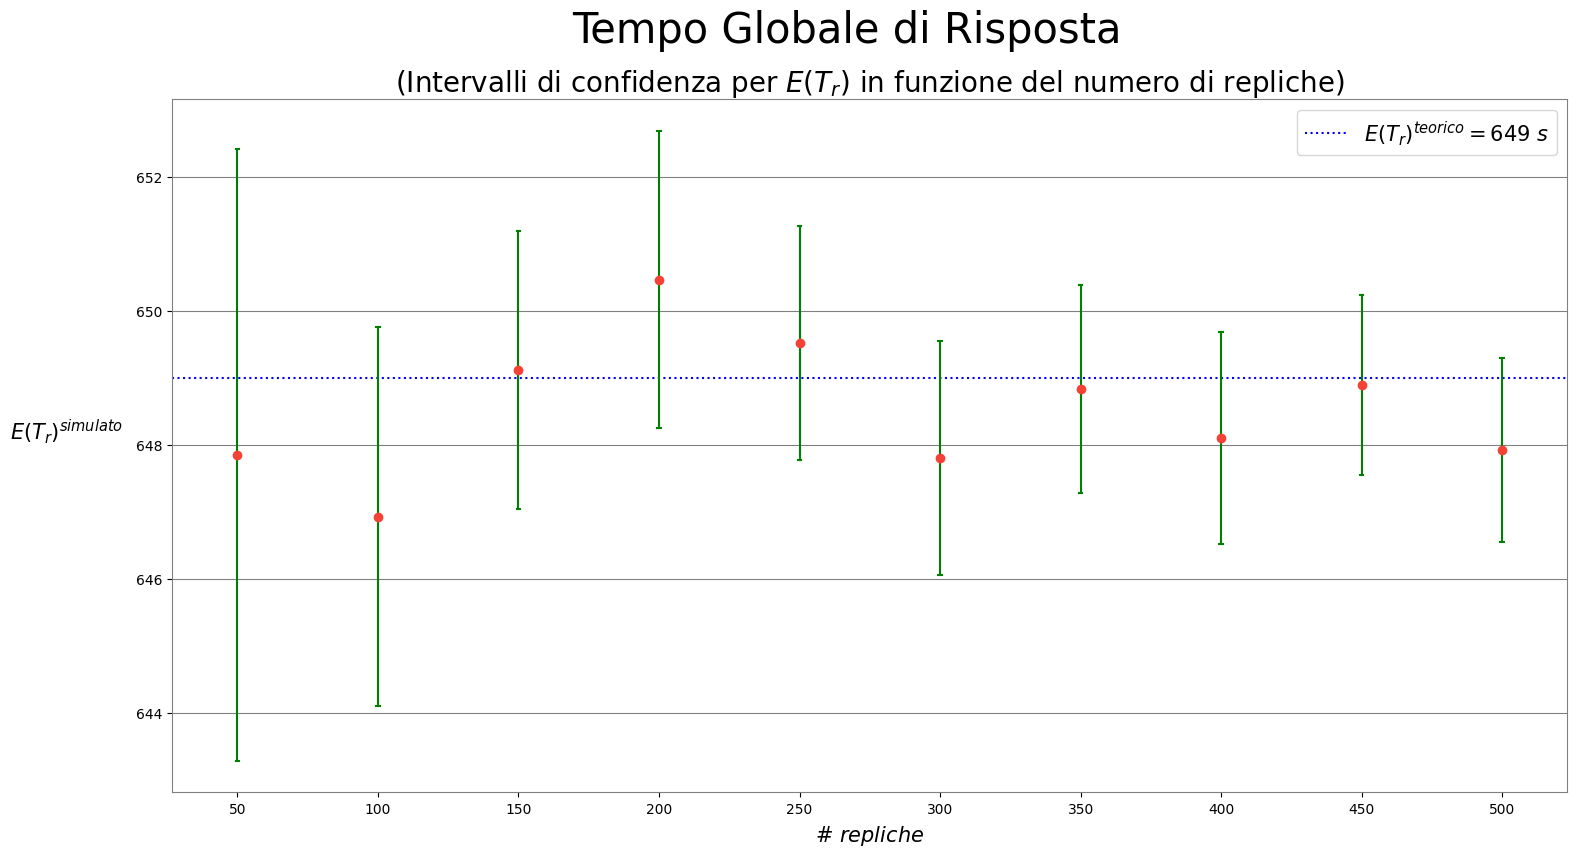

In [50]:
# This block is used to plot (and compute) the estimate intervals in the finite simulation.

df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_50.csv")
df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_100.csv") 
df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_150.csv")
df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_200.csv")
df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_250.csv") 
df6 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_300.csv")
df7 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_350.csv")
df8 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_400.csv") 
df9 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_450.csv")
df10 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/finite/grt_500.csv")

dfList = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

def plot_confidence_interval(z=1.96, color='#2187bb', horizontal_line_width=0.25):
    
    with mp.rc_context(context):
        
        mp.figure(figsize=(18,9))
        
        mp.suptitle("Tempo Globale di Risposta", color=label_color, fontsize=title_fontsize)
        mp.title("(Intervalli di confidenza per "+ r"$E(T_{r})$" + " in funzione del numero di repliche)", fontsize=20)
        
        mp.grid(axis='y', color=grid_color)
        
        mp.ylabel(r"$E(T_{r})^{simulato}$" , color=label_color, fontsize=axes_fontsize, labelpad=50, rotation=0)
        mp.xlabel(r"$\#\ repliche$", color=label_color, fontsize=axes_fontsize, labelpad=5)
        
        #mp.axhline(y = qos, color = 'r', linestyle = ':', label = r"$QoS = 600\ s$")
        mp.axhline(y = grt_theoretical, color = 'b', linestyle = ':', label = r"$E(T_{r})^{teorico} = 649\ s$")
        
        legend = mp.legend(fontsize=15)
        mp.setp(legend.get_texts(), color=label_color)
        
        mp.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
        
    for i in range(len(dfList)):
        
        x = i+1
        values = dfList[i].loc[:,'grt']
        
        mean = statistics.mean(values)
        stdev = statistics.stdev(values)
        confidence_interval = z * stdev / sqrt(len(values))

        left = x - horizontal_line_width / 20
        top = mean - confidence_interval
        right = x + horizontal_line_width / 20
        bottom = mean + confidence_interval

        mp.plot([x, x], [top, bottom], color=plot_color)
        mp.plot([left, right], [top, top], color=plot_color)
        mp.plot([left, right], [bottom, bottom], color=plot_color)
        mp.plot(x, mean, 'o', color='#f44336')

    mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/grt_finite.svg')
    mp.show()
     
plot_confidence_interval()

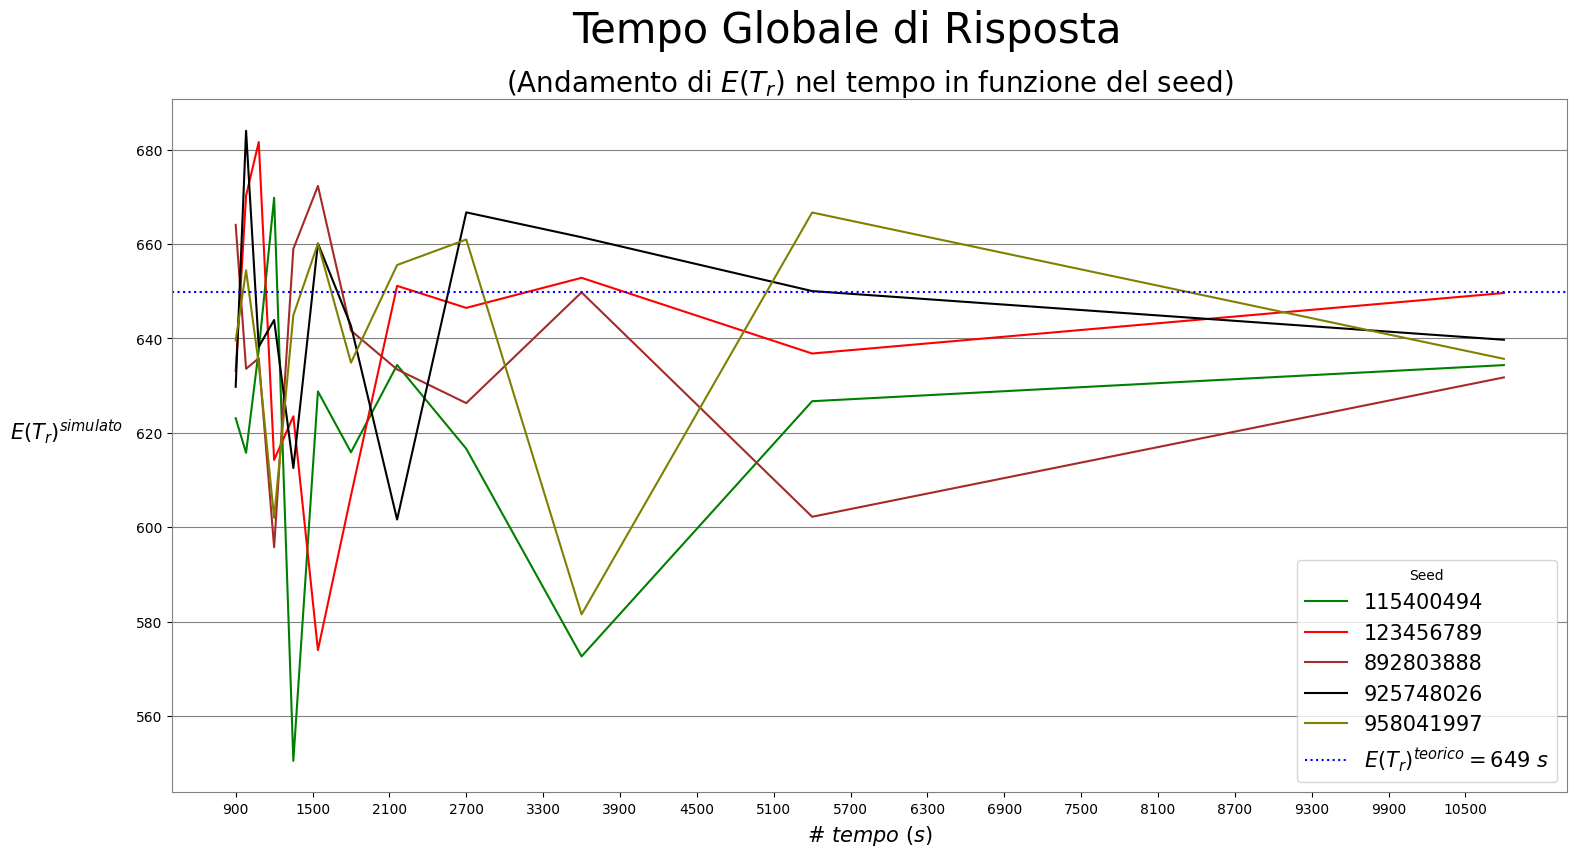

In [93]:
# This block is used to plot the global response time by varying the seed in the finite simulation.

def plot_seed_grt():

    df1 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/grt_115400494.csv")
    df2 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/grt_123456789.csv")
    df3 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/grt_892803888.csv")
    df4 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/grt_925748026.csv")
    df5 = pd.read_csv("/home/mattia/Desktop/PMCSN/pmcsn/result/standard/grt_958041997.csv")

    with mp.rc_context(context):
        
        mp.figure(figsize=(18,9))
        
        mp.plot(df1.loc[:,'period'], df1.loc[:,'grt'], color=plot_color, label = "115400494")
        mp.plot(df2.loc[:,'period'], df2.loc[:,'grt'], color='red', label = "123456789")
        mp.plot(df3.loc[:,'period'], df3.loc[:,'grt'], color='brown', label = "892803888")
        mp.plot(df1.loc[:,'period'], df4.loc[:,'grt'], color="black", label = "925748026")
        mp.plot(df2.loc[:,'period'], df5.loc[:,'grt'], color='olive', label = "958041997")
        
        mp.suptitle("Tempo Globale di Risposta", color=label_color, fontsize=title_fontsize)
        mp.title("(Andamento di "+ r"$E(T_{r})$" + " nel tempo in funzione del seed)", fontsize=20)
        
        mp.grid(axis='y', color=grid_color)
        
        mp.ylabel(r"$E(T_{r})^{simulato}$" , color=label_color, fontsize=axes_fontsize, labelpad=50, rotation=0)
        mp.xlabel(r"$\#\ tempo\ (s)$", color=label_color, fontsize=axes_fontsize, labelpad=5)
        
        start = int(df1.loc[:,'period'][0])
        end = int(df1.loc[:,'period'][len(df1)-1])
        
        mp.axhline(y = grt_theoretical, color = 'b', linestyle = ':', label = r"$E(T_{r})^{teorico} = 649\ s$")
        
        mp.xticks(ticks=range(start, end, 600))
        
        legend = mp.legend(fontsize=15, title = "Seed")
        mp.setp(legend.get_texts(), color=label_color)
        
        mp.savefig('/home/mattia/Desktop/PMCSN/pmcsn/charts/grt_seed.svg')
        
        mp.show()
                   
plot_seed_grt()